In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

## Select Feature and Target

In [7]:
X = df[['Age', 'EstimatedSalary']].values
Y = df['Purchased'].values 

## Splitting Dataset

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=50)

## Applying SMOTE

In [9]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=50)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [10]:
pd.Series(Y_train).value_counts()

0    203
1    203
Name: count, dtype: int64

## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Training the Model


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

regression = LogisticRegression(max_iter=1500)


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],       # Type of regularization
    'solver': ['liblinear', 'saga'] # Solvers that support L1 and L2
}

# Perform GridSearchCV
grid_search = GridSearchCV(regression, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

regression=LogisticRegression(C=0.1,penalty='l1',solver='saga')
regression.fit(X_train,Y_train)

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [13]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use best model to predict on test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.8499548328816621
Test Accuracy: 0.825


## Predictions

In [14]:
Y_pred=regression.predict(X_test)
Y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

## Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

cm=confusion_matrix(Y_test,Y_pred)
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

accuracy = accuracy_score(Y_test, Y_pred)
error_rate = 1 - accuracy
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

In [16]:
print(f'Confusion Metrix: \n {cm}')
print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Confusion Metrix: 
 [[49  5]
 [ 9 17]]
TP: 17, FP: 5, TN: 49, FN: 9
Accuracy: 0.82
Error Rate: 0.18
Precision: 0.77
Recall: 0.65


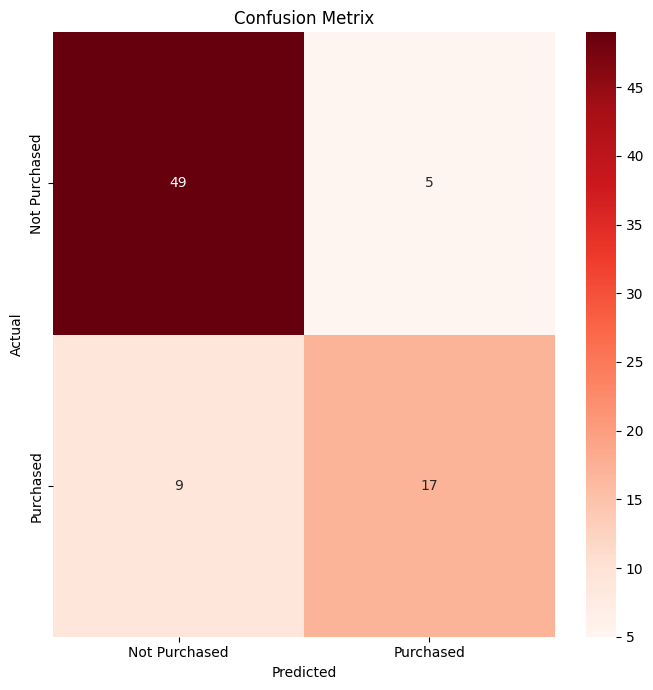

In [17]:
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds',xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Metrix")
plt.tight_layout()
plt.show()